In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Handling Null Values

In [6]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
# Identify float columns
float_cols = df.select_dtypes(include=['float']).columns

# Replace null values in float columns with their median
df.fillna({col: df[col].median() for col in float_cols}, inplace=True)

In [9]:
# Identify float columns
float_cols = df.select_dtypes(include=['int']).columns

# Replace null values in float columns with their median
df.fillna({col: df[col].mean() for col in float_cols}, inplace=True)

In [10]:
df.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Vizualization

In [11]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 10:  # Condition for less than 10 unique values
        print(f"Column: {col}")
        
        print(unique_values)
        print("-" * 40)


Column: SeriousDlqin2yrs
[1 0]
----------------------------------------


1) SeriousDlqin2yrs = 1 → The individual had a serious delinquency (missed payments or defaulted).
2) SeriousDlqin2yrs = 0 → The individual did not have any serious delinquency.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

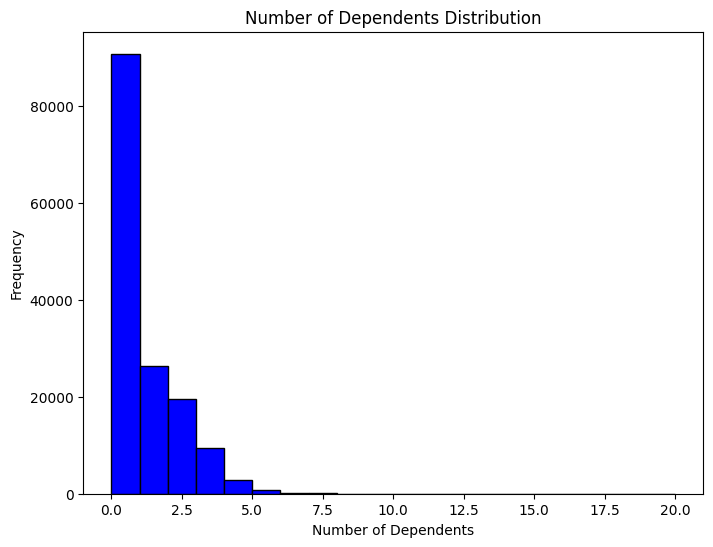

In [59]:
plt.figure(figsize=(8,6))
plt.hist(df['NumberOfDependents'], bins=20, color='blue', edgecolor='black')
plt.title('Number of Dependents Distribution')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.show()

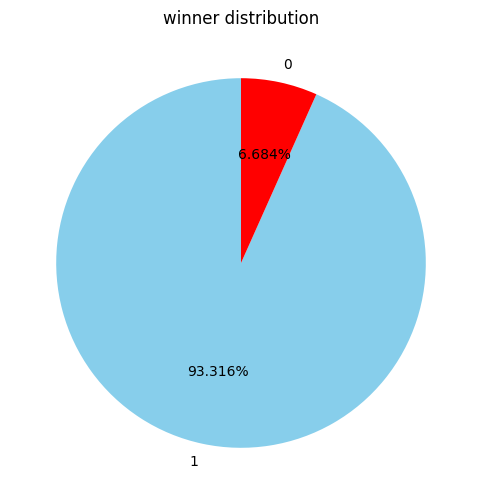

In [19]:
plt.figure(figsize = (8,6))
s_count = df["SeriousDlqin2yrs"].value_counts()
name = ['1', '0']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['skyblue','red'])
# autopct -> to display percentage with decimal 
# start angle -> to rotate the pie chart
plt.title("winner distribution")
plt.show()

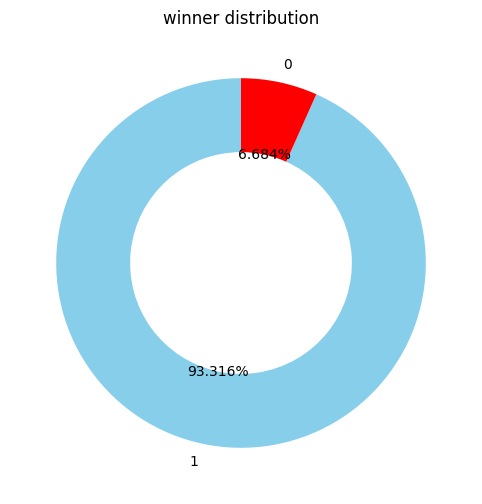

In [49]:
plt.figure(figsize = (8,6))
s_count = df["SeriousDlqin2yrs"].value_counts()
name = ['1', '0']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['skyblue','red'], wedgeprops=dict(width=0.4))
plt.title("winner distribution")
plt.show()

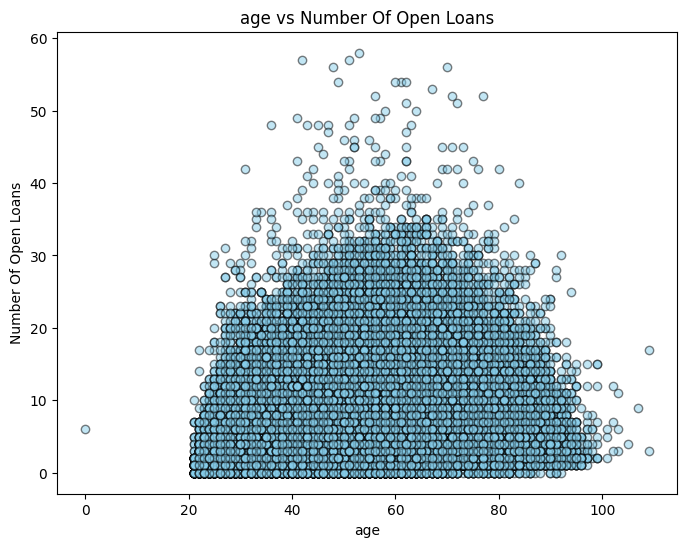

In [28]:
plt.figure(figsize = (8,6))
plt.scatter(df['age'], df['NumberOfOpenCreditLinesAndLoans'], c = 'skyblue', edgecolor = 'k', alpha = 0.5)
# alpha -> to control the transparency
# k -> black color
plt.title('age vs Number Of Open Loans')
plt.xlabel('age')
plt.ylabel('Number Of Open Loans')
plt.show()


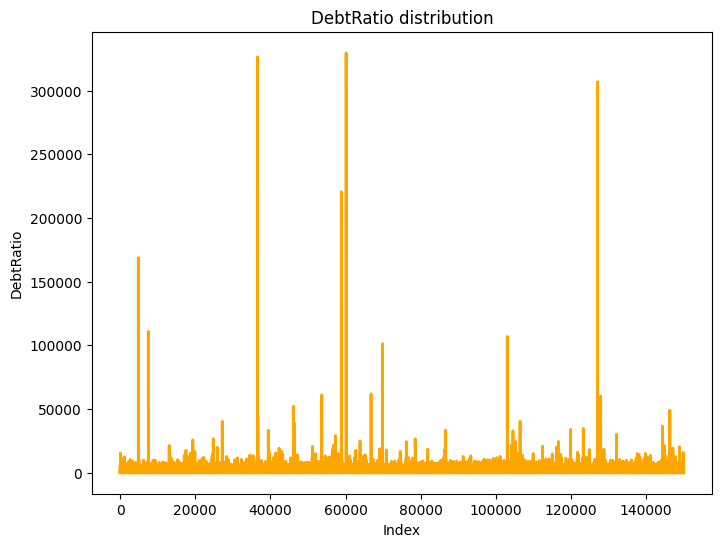

In [31]:
plt.figure(figsize = (8,6))
plt.plot(df.index, df['DebtRatio'], c = 'orange', lw = 2)
# lw -> line width
plt.title('DebtRatio distribution')
plt.xlabel('Index')
plt.ylabel('DebtRatio')
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

<Figure size 800x600 with 0 Axes>

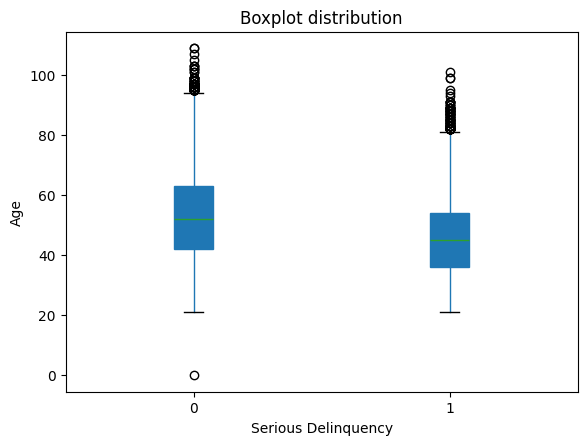

In [41]:
plt.figure(figsize = (8,6))
df.boxplot(column = 'age', by = 'SeriousDlqin2yrs', grid = False, patch_artist = True)
# patch_artist -> to fill the boxplot with color
plt.suptitle('')
plt.title('Boxplot distribution')
plt.xlabel('Serious Delinquency')
plt.ylabel('Age')
plt.show()

## Model Training

In [42]:
X = df.drop('SeriousDlqin2yrs', axis=1)  
y = df['SeriousDlqin2yrs']  

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred = clf.predict(X_test)

In [62]:
# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Print the classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9371
Confusion Matrix:
[[27746   298]
 [ 1589   367]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.55      0.19      0.28      1956

    accuracy                           0.94     30000
   macro avg       0.75      0.59      0.62     30000
weighted avg       0.92      0.94      0.92     30000

